<a href="https://colab.research.google.com/github/okwasna/dane_wszystkie/blob/main/dane_wszystkie12.10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [4]:


file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')

print(f"Liczba genów przed filtrowaniem: {len(df)}")

mean_before_filtering = df['var'].mean()
variance_before_filtering = df['var'].var()

print(f"Średnia wariancji przed filtrowaniem: {mean_before_filtering}")
print(f"Wariancja przed filtrowaniem: {variance_before_filtering}")

variance_threshold = 10

df_filtered = df[df['var'] >= variance_threshold]

mean_after_filtering = df_filtered['var'].mean()
variance_after_filtering = df_filtered['var'].var()

print(f"Średnia wariancji po filtrowaniu: {mean_after_filtering}")
print(f"Wariancja po filtrowaniu: {variance_after_filtering}")

initial_counts = df['lncRNA'].value_counts()

filtered_counts = df_filtered['lncRNA'].value_counts()

removed_counts = initial_counts - filtered_counts

removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")

Liczba genów przed filtrowaniem: 28677
Średnia wariancji przed filtrowaniem: 83837021.10925484
Wariancja przed filtrowaniem: 1.4257388777828288e+20
Średnia wariancji po filtrowaniu: 108068243.92073244
Wariancja po filtrowaniu: 1.837809291273408e+20
Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [6]:
print(f"Liczba próbek (kolumn) branych pod uwagę do klastrowania: {df_filtered.shape[1]}")
print(f"Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: {df_filtered.shape[0]}")


Liczba próbek (kolumn) branych pod uwagę do klastrowania: 31
Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: 22247


In [12]:
data_values = df_filtered.loc[:, 'SRR7451446':]

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

# KMeans dla 40 klastrów
n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_normalized)

df_filtered.loc[:, f'Cluster_{n_clusters}'] = kmeans.labels_
silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")

cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:")
print(cluster_counts)

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")

Średni wskaźnik Silhouette dla 40 klastrów: 0.8674
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
0     16200
14     1978
28     1382
7       944
3       567
21      476
16      239
29      128
39      123
9        68
24       33
37       32
26       18
33       14
22        6
4         5
32        4
35        3
34        2
38        2
19        2
18        2
31        2
11        1
23        1
6         1
2         1
13        1
1         1
15        1
10        1
25        1
5         1
30        1
36        1
12        1
17        1
8         1
20        1
27        1
Name: count, dtype: int64
Całkowita liczba genów przypisanych do klastrów: 22247


musisz zrobic jeszcze k-means 30-50 co 5, zrobic sillhoute dla wszystkich klastrow, ogarnac klastrowanie dbscan, usunac komentarze

In [15]:
cluster_0_genes = df_filtered[df_filtered[f'Cluster_{n_clusters}'] == 0]

print(f"Ilość genów w klastrze 0: {len(cluster_0_genes)}")


Ilość genów w klastrze 0: 16200


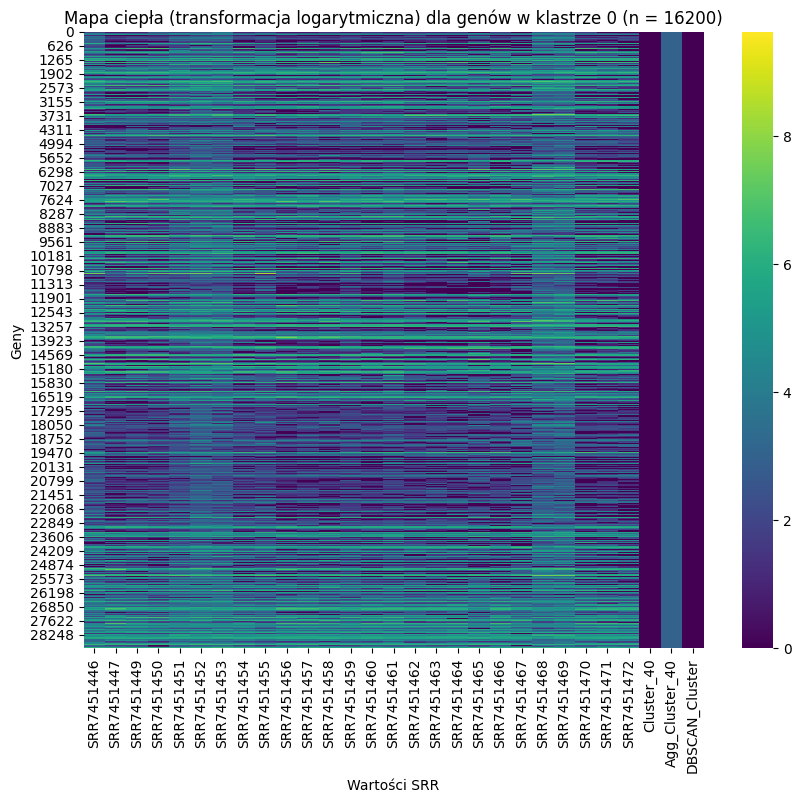

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_0_genes_log = np.log1p(cluster_0_genes.loc[:, 'SRR7451446':])

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_0_genes_log, cmap="viridis", cbar=True)
plt.title(f"Mapa ciepła (transformacja logarytmiczna) dla genów w klastrze 0 (n = {len(cluster_0_genes)})")
plt.xlabel("Wartości SRR")
plt.ylabel("Geny")
plt.show()


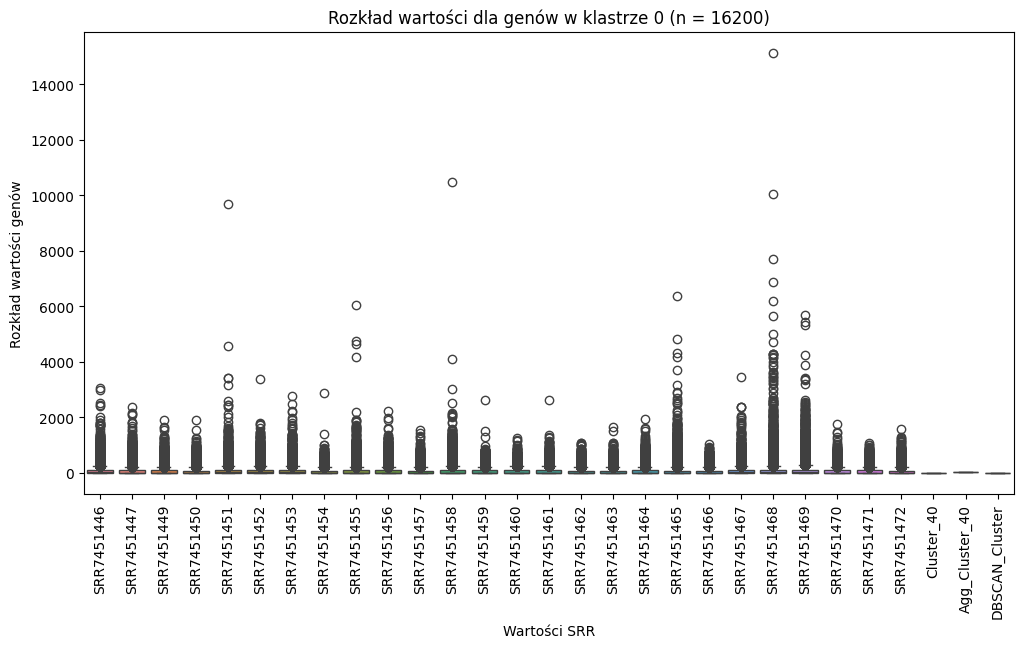

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cluster_0_genes.loc[:, 'SRR7451446':])
plt.title(f"Rozkład wartości dla genów w klastrze 0 (n = {len(cluster_0_genes)})")
plt.xlabel("Wartości SRR")
plt.ylabel("Rozkład wartości genów")
plt.xticks(rotation=90)
plt.show()


In [ ]:
#zrobić wizualizacje (heatmapa + wykres)

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering = AgglomerativeClustering(n_clusters=40)
agg_labels = agg_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'Agg_Cluster_40'] = agg_labels

agg_silhouette_avg = silhouette_score(data_normalized, agg_labels)
print(f"Średni wskaźnik Silhouette dla Agglomerative Clustering (40 klastrów): {agg_silhouette_avg:.4f}")


agg_cluster_counts = pd.Series(agg_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla Agglomerative Clustering (40 klastrów):")
print(agg_cluster_counts)


<ipython-input-13-240c6fac1cb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Agg_Cluster_40'] = agg_labels


Średni wskaźnik Silhouette dla Agglomerative Clustering (40 klastrów): 0.8670
Ilość genów w każdym klastrze dla Agglomerative Clustering (40 klastrów):
19    16200
17     1978
18     1382
16      944
39      552
15      476
13      236
30      146
10      124
7        64
1        37
5        33
9        17
3        14
2         6
6         5
4         4
14        3
12        3
8         2
0         2
28        1
26        1
35        1
37        1
20        1
29        1
11        1
32        1
34        1
25        1
31        1
21        1
24        1
33        1
36        1
23        1
22        1
38        1
27        1
Name: count, dtype: int64


In [14]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels

dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla DBSCAN:")
print(dbscan_cluster_counts)

if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette_avg = silhouette_score(data_normalized, dbscan_labels)
    print(f"Średni wskaźnik Silhouette dla DBSCAN: {dbscan_silhouette_avg:.4f}")
else:
    print("Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).")


Ilość genów w każdym klastrze dla DBSCAN:
 0    16200
 2     2318
 1     1978
 3      639
-1      531
 5      437
 4      144
Name: count, dtype: int64
Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).


<ipython-input-14-bbbb4f961d23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels
